<a href="https://colab.research.google.com/github/ruby-esther/Internship/blob/main/Task1_of_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Basic analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the dataset
df = pd.read_csv('/content/Bangalore  house data.csv')

In [3]:
#1st 5 data
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#data statistics
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
#check null values
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [8]:
#filling null values of society
df['society'].fillna('Unknown')

,society
0,Coomee
1,Theanmp
2,Unknown
3,Soiewre
4,Unknown
...,...
13315,ArsiaEx
13316,Unknown
13317,Mahla T
13318,SollyCl


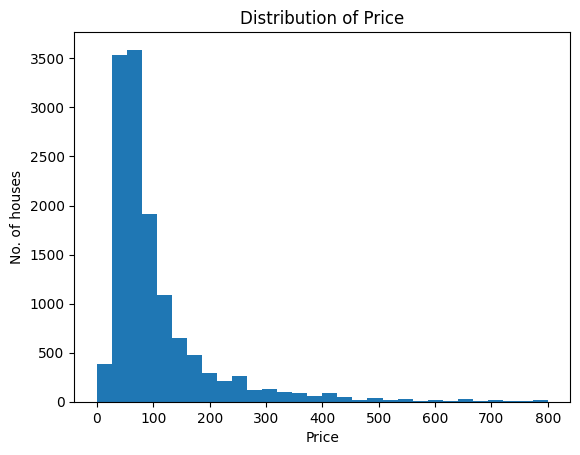

In [9]:
#plotting histogram for price
plt.hist(df['price'],bins=30,range=(0,800))
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('No. of houses')
plt.show()

In [10]:
import seaborn as sns

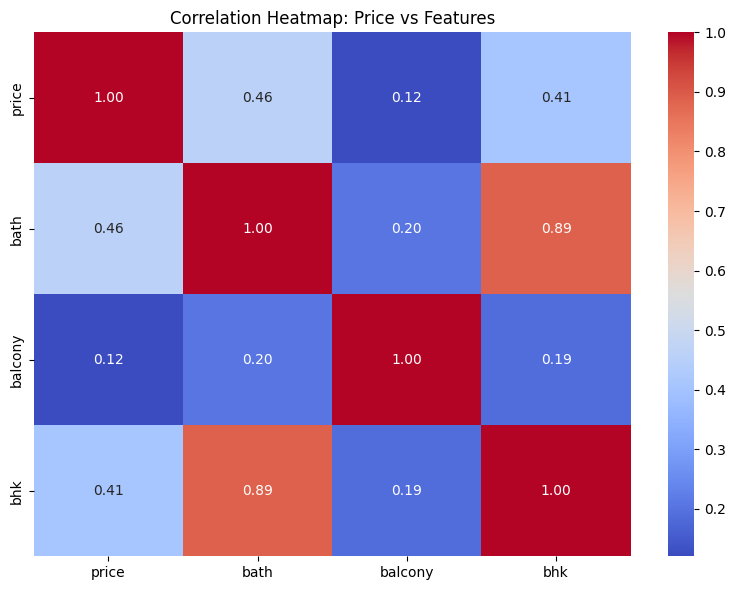

In [11]:
# Extract number from 'size'
df['bhk'] = df['size'].str.extract('(\d+)').astype(float)

# Select only the numerical columns
num_df = df[['price', 'bath', 'balcony', 'bhk']]

# Drop rows with missing data in selected columns
num_df = num_df.dropna()

plt.figure(figsize=(8, 6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Price vs Features")
plt.tight_layout()
plt.show()


Insight of this heatmap:

1.   More bedroom , higher price
2.   More the bathroom, higher the price too
3.   Balcony is not so related to price

In [12]:
#since total_sqft has '-' or 'sq.meter', convert it to float
def convert_sqft(x):
    try:
        if '-' in x:
            parts = x.split('-')
            return (float(parts[0]) + float(parts[1])) / 2
        else:
            return float(x)
    except:
        return None

df['total_sqft_clean'] = df['total_sqft'].apply(convert_sqft)
avg_sqft = df['total_sqft_clean'].mean()
print("Average Total Sqft:", round(avg_sqft, 2))


Average Total Sqft: 1559.63


/tmp/ipython-input-18-613941626.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bhk', y='price', data=avg_price_bhk, palette='viridis')


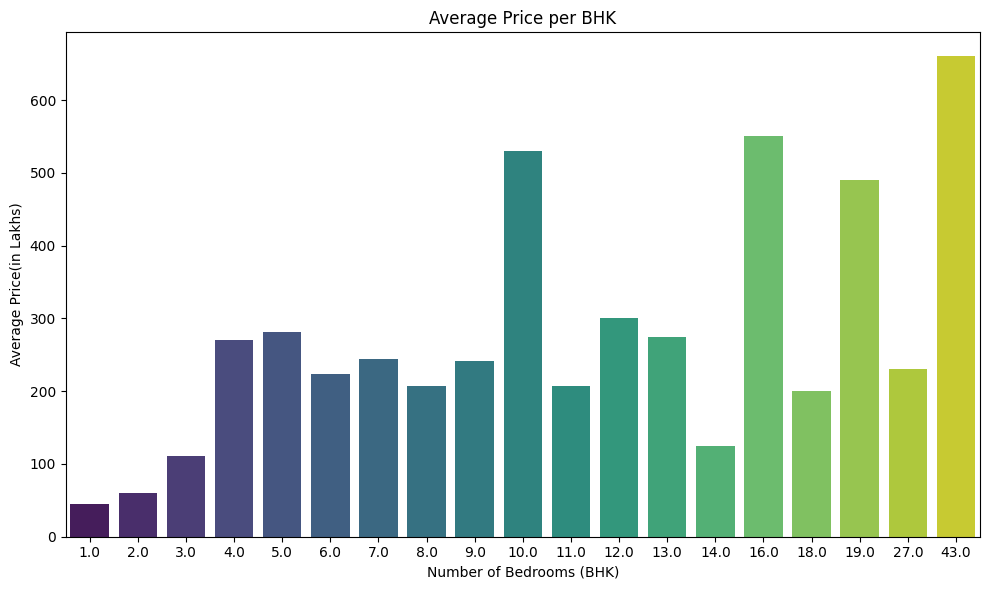

In [18]:
#barchart for price vs bhk
df_new = df.dropna(subset=['bhk', 'price'])

# Group by BHK and calculate average price
avg_price_bhk = df_new.groupby('bhk')['price'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='bhk', y='price', data=avg_price_bhk, palette='viridis')

# Add labels and title
plt.title('Average Price per BHK')
plt.xlabel('Number of Bedrooms (BHK)')
plt.ylabel('Average Price(in Lakhs)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [19]:
df['bhk'] = df['size'].str.extract('(\d+)').astype(float)

# Count how many of each BHK
bhk_counts = df['bhk'].value_counts().sort_index()
print(bhk_counts)


bhk
1.0      656
2.0     5528
3.0     4857
4.0     1417
5.0      356
6.0      221
7.0      100
8.0       89
9.0       54
10.0      14
11.0       4
12.0       1
13.0       1
14.0       1
16.0       1
18.0       1
19.0       1
27.0       1
43.0       1
Name: count, dtype: int64


The house with large number of bedrooms can be a mansion or palace